In [1]:
# Author: Marco Lugo
# Description: Monty Hall Paradox simulator #2. See README for more details.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit

np.random.seed(404) # seed for pseudo-random number generation; for reproducibility purposes
N = 100000

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
@jit(nopython=True)
def run_monty_hall():
    prize_door_list = list(np.random.randint(low=1, high=4, size=N))
    guest_choice_list = list(np.random.randint(low=1, high=4, size=N))
    host_choice_randomizer_list = list(np.random.randint(low=0, high=2, size=N))
    guest_choice_randomizer_list = list(np.random.randint(low=0, high=2, size=N))
    results = []
    
    for i in range(N):
        guest_choice = guest_choice_list[i]
        prize_door = prize_door_list[i]
        host_choice = make_host_choice(guest_choice, prize_door, host_choice_randomizer_list[i])
        switched_guest_choice = switch_guest_choice(guest_choice, host_choice, guest_choice_randomizer_list[i])
        results.append([guest_choice==prize_door, switched_guest_choice==prize_door])
    return results
    
def get_results_df():
    df = pd.DataFrame(data=run_monty_hall(), columns=['no_switch', 'switch'])
    df['cum_wins_switch_pct'] = df['switch'].cumsum() / (df.index + 1)
    df['cum_wins_no_switch_pct'] = df['no_switch'].cumsum() / (df.index + 1)
    return df

@jit(nopython=True)
def make_host_choice(guest_choice, prize_door, host_choice_randomizer):
    if guest_choice != prize_door: # guest did not pick car right away, can only reveal the remaining goat
        for i in range(1,4):
            if i != guest_choice and i != prize_door:
                host_choice = i
                break
    elif guest_choice == prize_door: # guest picked the car from the start, give back a random goat
        if guest_choice == 1:
            host_choice = [2,3][host_choice_randomizer]
        elif guest_choice == 2:
            host_choice = [1,3][host_choice_randomizer]
        elif guest_choice == 3:
            host_choice = [1,2][host_choice_randomizer]
    return host_choice

@jit(nopython=True)
def switch_guest_choice(initial_choice, host_choice, guest_choice_randomizer):
    possible_choices = [d for d in [1,2,3] if d not in [initial_choice, host_choice]]
    if len(possible_choices) > 1: # if more than one choice, randomize the result
        final_choice = possible_choices[guest_choice_randomizer]
    else: # only one possible choice...
        final_choice = possible_choices[0]
    return final_choice

def show_stats(df):
    print(f'Number of plays per strategy: {N}')
    print(f'Switching strategy won {df["switch"].mean()*100}% of the time.')
    print(f'Non-switching strategy won {df["no_switch"].mean()*100}% of the time.')
          
def show_graph(self):
    ax = df[['cum_wins_switch_pct', 'cum_wins_no_switch_pct']].plot.area(figsize=(15,8), alpha=0.35, stacked=False, grid=True, fontsize=12)
    ax.set_title('Cumulative Chances of Winning', size=21)
    ax.set_xlabel('Number of Iterations', size=14)
    ax.set_ylabel('Win Percentage',  size=14)
    ax.legend(['', ''])

In [3]:
df = get_results_df()

In [4]:
show_stats(df)

Number of plays per strategy: 100000
Switching strategy won 66.692% of the time.
Non-switching strategy won 33.308% of the time.


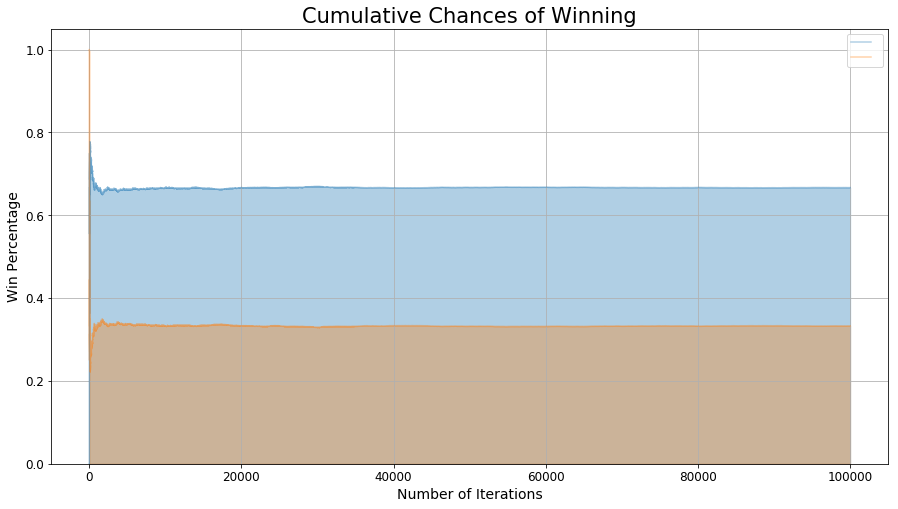

In [5]:
show_graph(df)

In [6]:
%%timeit
df = get_results_df()

135 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
